In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#导入数据
csv_filename = "oneYearData.csv"
csv_data = pd.read_csv(csv_filename, low_memory=False)
csv_df = pd.DataFrame(csv_data)

################数据清洗####################
#去掉含有NaN的行
csv_df = csv_df.dropna(axis=0, how='any')
#去掉不符合常理的行，如cpu占用率大于100%的
csv_df = csv_df[(csv_df['KPI_VALUE'] < 100)]

print(csv_df.head(),'\n',csv_df.tail())

   EQ_ID          KPI_ID  KPI_VALUE            COLL_TIME
0    178  PM-H-01-010-11      2.667  2017-02-01 00:13:56
1    178  PM-H-01-010-11      1.667  2017-02-01 00:28:53
2    178  PM-H-01-010-11      2.000  2017-02-01 00:44:00
3    178  PM-H-01-010-11      0.333  2017-02-01 00:58:57
4    178  PM-H-01-010-11      3.000  2017-02-01 01:13:48 
          EQ_ID          KPI_ID  KPI_VALUE            COLL_TIME
2633815    286  PM-H-01-010-11      5.000  2018-12-31 23:33:30
2633816    286  PM-H-01-010-11      1.000  2018-12-31 23:39:07
2633817    286  PM-H-01-010-11      1.000  2018-12-31 23:45:07
2633818    286  PM-H-01-010-11      0.667  2018-12-31 23:51:09
2633819    286  PM-H-01-010-11      0.667  2018-12-31 23:57:07


### 总共2633820条数据，采集的时间从2017年2月1日00:13:56到2018年12月31日23:57:07
---

In [52]:
gp = csv_df.groupby('KPI_ID')
gp.count()

,EQ_ID,KPI_VALUE,COLL_TIME
KPI_ID,,,
PM-H-01-010-11,2633820,2633820,2633820


### 本次采集的数据全是PM-H-01-010-11，说明只有CPU的占用率指标，不包含内存和磁盘等其他的指标
---

       KPI_VALUE  COLL_TIME
EQ_ID                      
178       175599     175599
179       175599     175599
206       175595     175595
207       175598     175598
222       175585     175585
231       175585     175585
232       175618     175618
233       175504     175504
234       175637     175637
242       175576     175576
264       175577     175577
265       175604     175604
271       175590     175590
272       175588     175588
286       175565     175565
       KPI_VALUE  COLL_TIME
count       15.0       15.0
mean    175588.0   175588.0


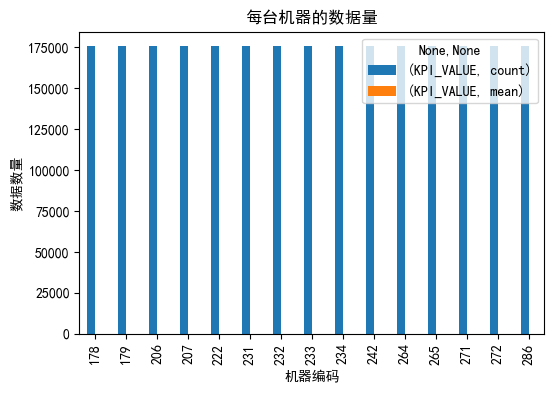

In [53]:
gp = csv_df[['KPI_VALUE','COLL_TIME']].groupby(csv_df['EQ_ID'])
print(gp.count())
print(gp.count().agg(['count','mean']))
gp.agg(['count','mean']).plot(kind='bar')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.title('每台机器的数据量')
plt.xlabel('机器编码')
plt.ylabel('数据数量')
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100
plt.savefig('每台机器的数据量',dpi=300)
plt.show()

### EQ_ID应该是每台机器的编码，总共有15台机器，每台机器平均175588条数据
---

### 随机选取一台机器进行分析（编号178）

In [54]:
machine_num = gp.size().index
#随机选取其中一台机器
machine = csv_df[(csv_df['EQ_ID'] == machine_num[0])]
mdf = machine[['KPI_VALUE','COLL_TIME']]

print("这台机器的数据情况：\n")
print(mdf.describe(),'\n',mdf.head())

# 将数据类型转换为日期类型
mdf['COLL_TIME'] = pd.to_datetime(mdf['COLL_TIME'])
#按照天,月分类
mdf['DAY'] = mdf['COLL_TIME'].dt.to_period('D')
mdf['MONTH'] = mdf['COLL_TIME'].dt.to_period('M')


这台机器的数据情况：

           KPI_VALUE
count  175599.000000
mean        2.171859
std         1.933994
min         0.000000
25%         0.667000
50%         1.667000
75%         3.000000
max        35.000000 
    KPI_VALUE            COLL_TIME
0      2.667  2017-02-01 00:13:56
1      1.667  2017-02-01 00:28:53
2      2.000  2017-02-01 00:44:00
3      0.333  2017-02-01 00:58:57
4      3.000  2017-02-01 01:13:48


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


### 画出两年时间里，每个月的日最大KPI_VALUE值的时间分布图

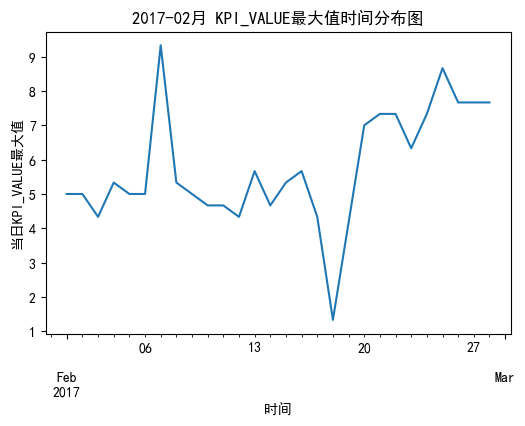

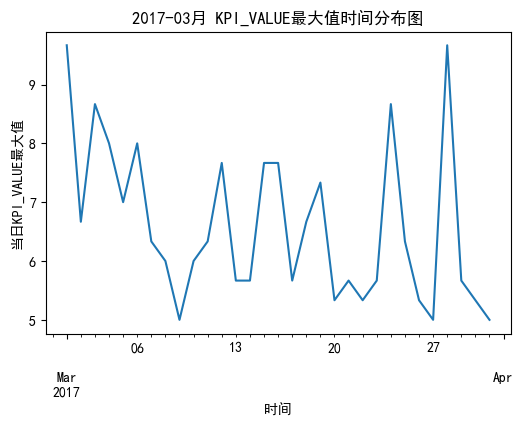

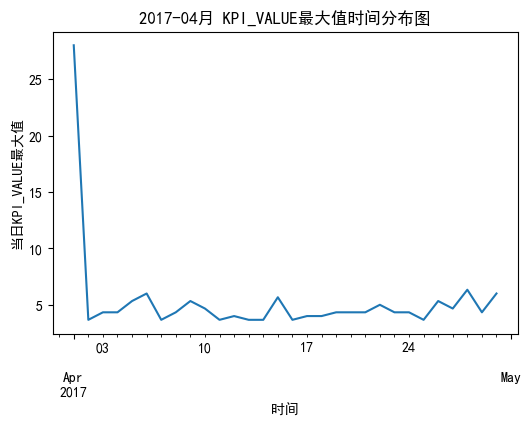

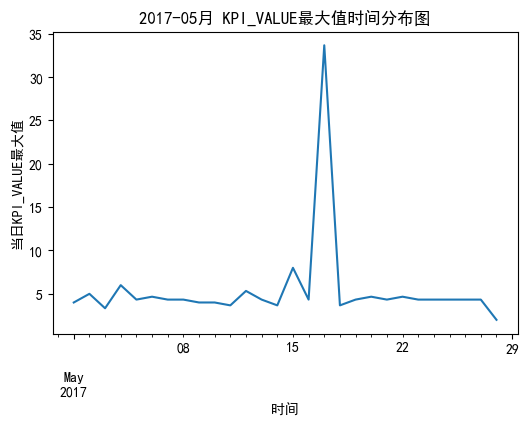

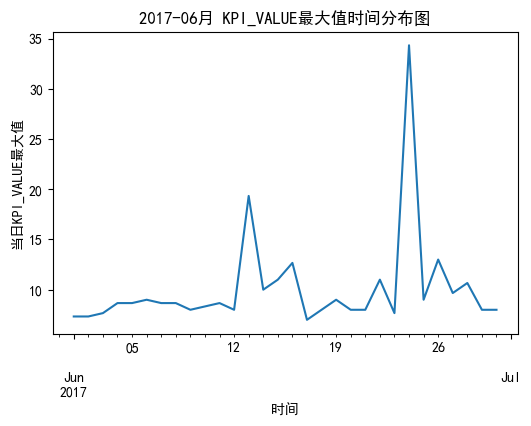

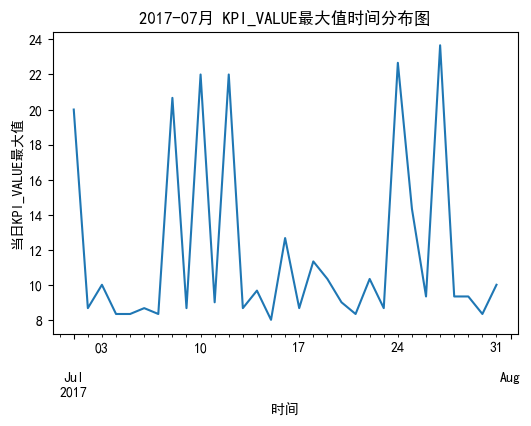

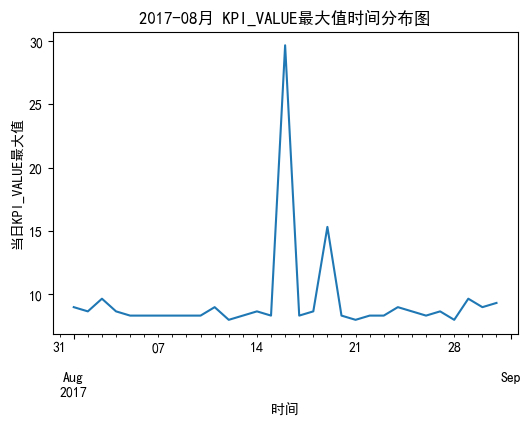

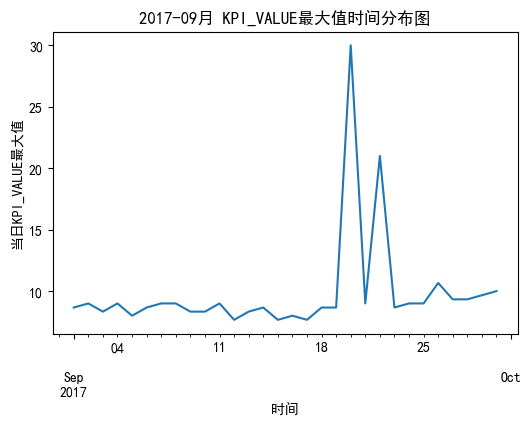

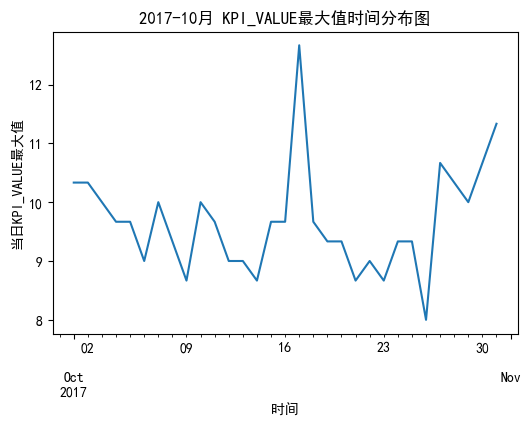

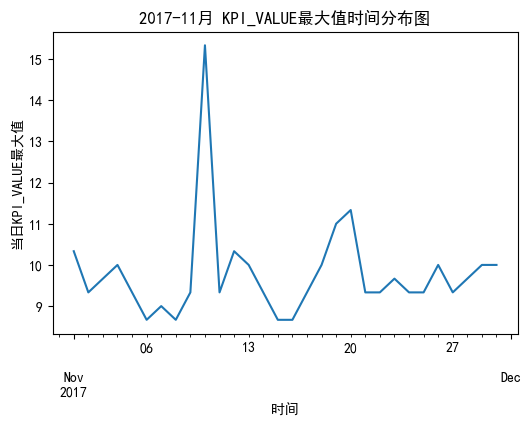

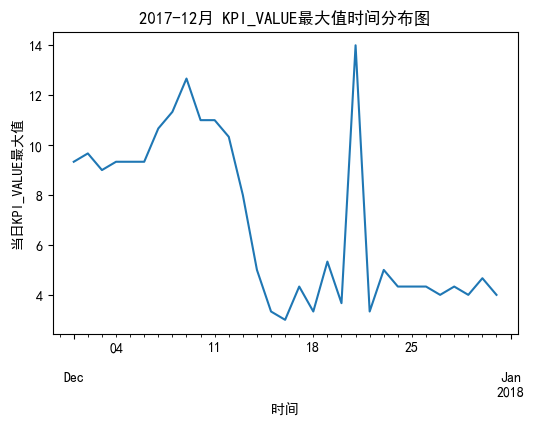

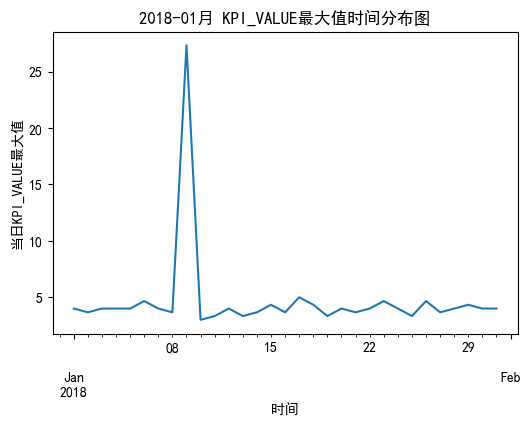

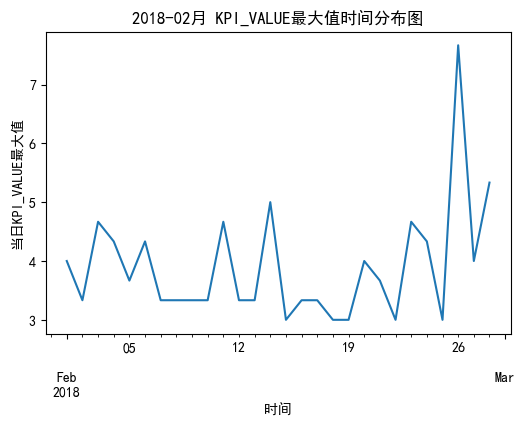

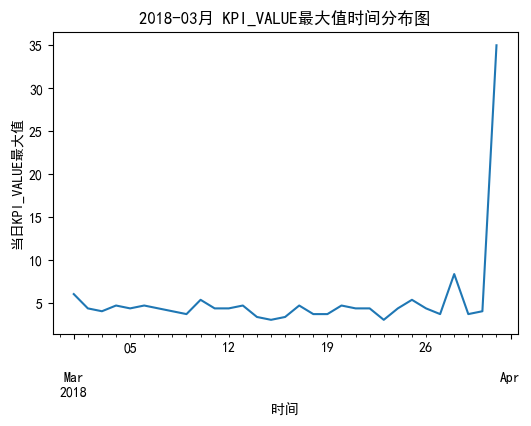

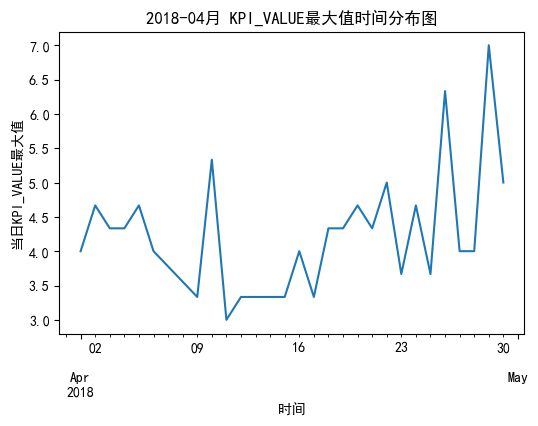

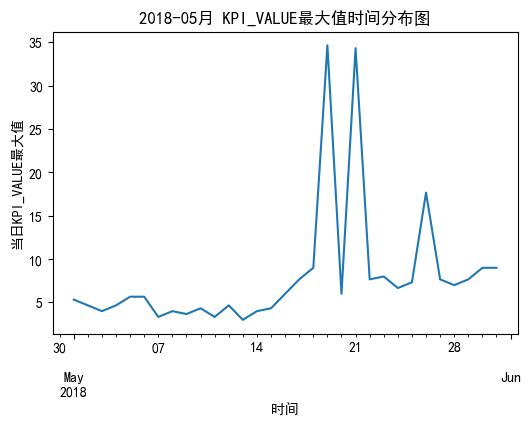

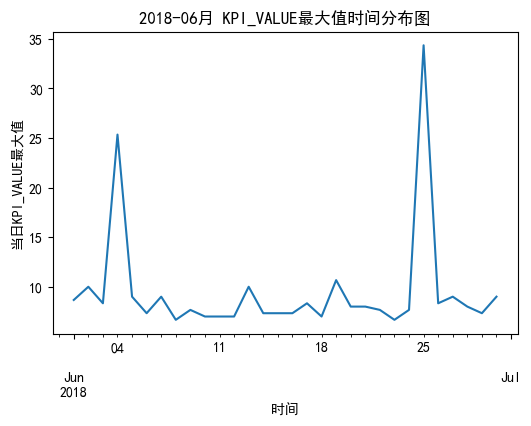

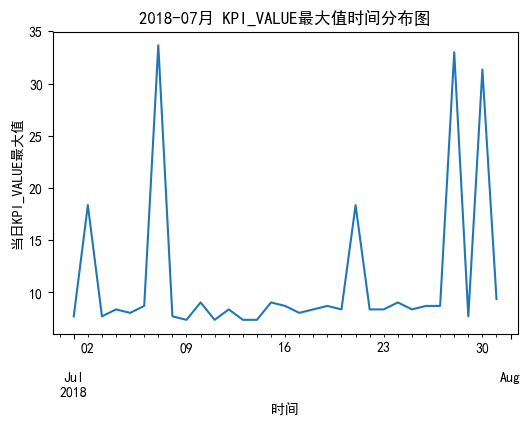

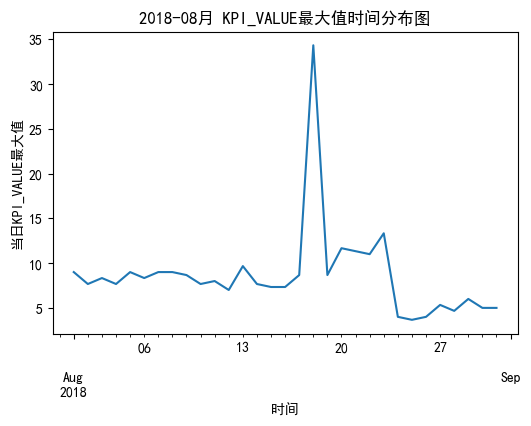

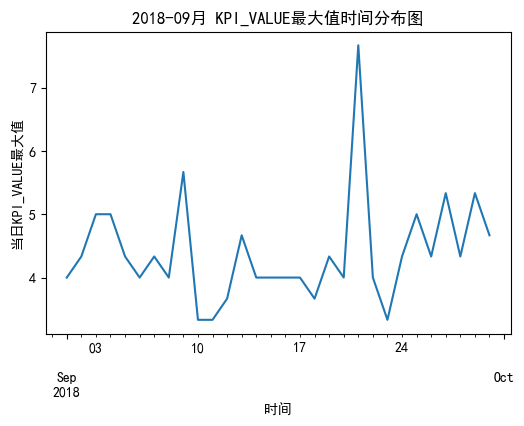

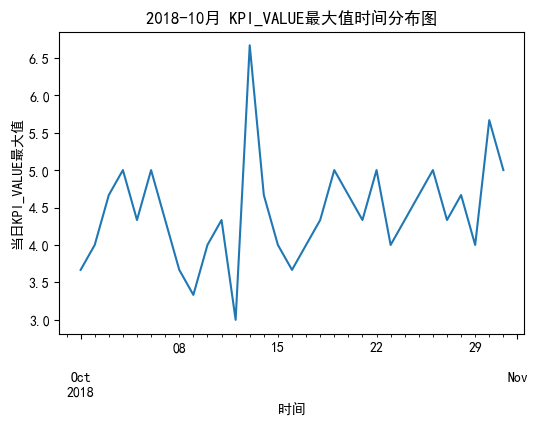

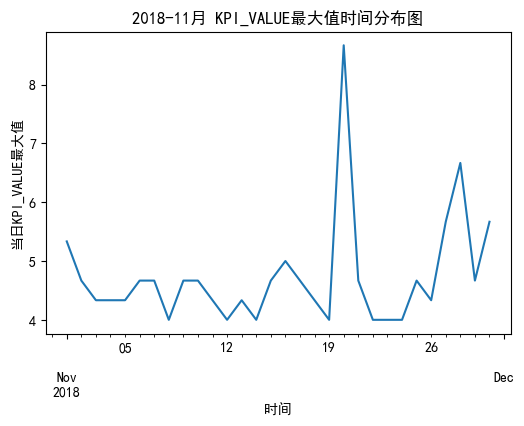

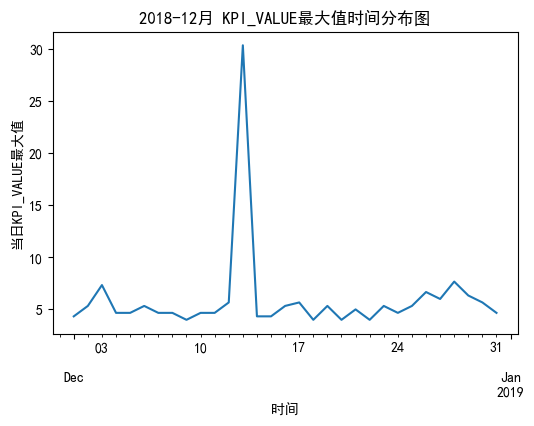

In [17]:
for month in mdf.loc[:,'MONTH'].unique():
    #提取出每个月的数据
    month_df = mdf[(mdf['MONTH'] == month)]
    month_df['KPI_VALUE'].groupby(month_df['DAY']).agg('max').plot(kind='line')
    #每天的最大值
#     day_df['day_time'] = month_df[(month_df['DAY'] == str(month_df.loc[:,'DAY'].unique()))]
#     day_df['day_max'] = max(day_df['day_time'])
#     day_df.plot()

    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.title('%s月 KPI_VALUE最大值时间分布图'%month)
    plt.xlabel('时间')
    plt.ylabel('当日KPI_VALUE最大值')
    plt.rcParams['savefig.dpi'] = 100
    plt.rcParams['figure.dpi'] = 100
    plt.savefig('%s月最大值分布图'%month,dpi=300)
    plt.show()
    

Text(0.5,1,'每个月的最大KPI_VALUE分布图')

Text(0.5,0,'月份')

Text(0,0.5,'kpi_value值')

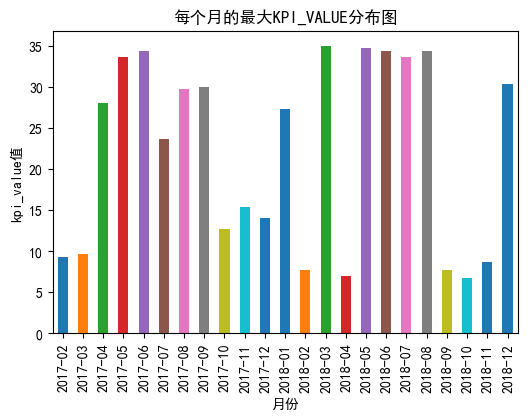

In [29]:
mdf['KPI_VALUE'].groupby(mdf['MONTH']).agg('max').plot(kind='bar')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.title('每个月的最大KPI_VALUE分布图')
plt.xlabel('月份')
plt.ylabel('kpi_value值')
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100
plt.savefig('每个月的最大KPI_VALUE分布图',dpi=300)
plt.show()

### 以上的数据显示，从2017年到2018年的时间里，每个月的最大kpi_value值都维持在相对比较安全的状态，最大不超过35%。
---
### 下面找出每个月出现最大值的时间

In [25]:
import matplotlib.dates as mdates
month_max = mdf.loc[:,['KPI_VALUE']].groupby(mdf['MONTH']).max().reset_index().drop('MONTH',axis=1)
month_max_id = mdf.loc[:,['KPI_VALUE']].groupby(mdf['MONTH']).idxmax().drop('MONTH',axis=1)
y = [str(i) for i in mdf.loc[month_max_id,'KPI_VALUE']]
plt.plot(month_max,y)
#设置横坐标显示时间的刻度范围
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#设置横坐标刻度
ticks = [str(i) for i in month_max['COLL_TIME']]
plt.xticks(ticks,rotation=90)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.title('每个月出现最大KPI_VALUE的时间')
plt.xlabel('时间')
plt.ylabel('kpi_value值')
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100
plt.savefig('每个月出现最大KPI_VALUE的时间',dpi=300)
plt.show()


KeyError: "labels ['MONTH'] not contained in axis"

### 可以看出，每个月出现最大kpi_value都是集中在月底的接近凌晨12点左右
---

In [56]:
month_max = mdf.loc[:,['KPI_VALUE']]#.groupby(mdf['MONTH']).max()
month_max_id = mdf.loc[:,['KPI_VALUE']].groupby(mdf['MONTH']).idxmax()
print(month_max.max())
print(mdf.loc[month_max_id,'COLL_TIME'])


KPI_VALUE    35.0
dtype: float64


ValueError: Cannot index with multidimensional key